<a href="https://colab.research.google.com/github/ROSERSM/Colab-R/blob/main/R_Dados_de_emiss%C3%B5es_de_carbono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
builtins()

In [ ]:
R.Version()
R.version
R.version.string
version

In [9]:
#Instalando pacotes do Rstudio
install.packages("rgl", repos = "http://cran.rstudio.com/")
install.packages("ConsRank", repos = "http://cran.rstudio.com/")
library("ConsRank")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘miniUI’, ‘webshot’, ‘shiny’, ‘manipulateWidget’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘data.table’, ‘rlist’, ‘proxy’, ‘gtools’


Loading required package: rgl

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”

Attaching package: ‘ConsRank’


The following object is masked from ‘package:base’:

    labels




In [10]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

In [11]:
#Instalação dos pocotes e bibliotecas
install.packages('ggmap')
install.packages('codetools')
install.packages('maps')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘RgoogleMaps’, ‘png’, ‘plyr’, ‘rjson’, ‘jpeg’, ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
# Principais bibliotecas que serão utilizadas no projeto
library(stringr)
library(dplyr)
library(ggplot2)
library(scales)
library(ggmap)
library(readr)
library(maps)
library(tidyr)
library(rvest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.


Attaching package: ‘readr’


The following object is masked from ‘package:scales’:

    col_factor


Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [13]:
#Importando arquivo de dados
emissions_by_countries <- read_csv("https://cdiac.ess-dive.lbl.gov/ftp/fossilfuel-co2-emissions/CSV-FILES/nation.1751_2014.csv", col_names = c("country", "year", "total_emissions", "gas_fuel_emissions", "liquid_fuel_emissions", "solid_fuel_emissions", "gas_flaring_emissions", "cement_prod_emissions", "per_capita_emission_rate", "bunker_fuel_emissions"), na = ".", skip = 4)


── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  year = col_double(),
  total_emissions = col_double(),
  gas_fuel_emissions = col_double(),
  liquid_fuel_emissions = col_double(),
  solid_fuel_emissions = col_double(),
  gas_flaring_emissions = col_double(),
  cement_prod_emissions = col_double(),
  per_capita_emission_rate = col_double(),
  bunker_fuel_emissions = col_double()
)




In [14]:
#Vizualização dos dados
glimpse(emissions_by_countries)

Rows: 17,232
Columns: 10
$ country                  <chr> "AFGHANISTAN", "AFGHANISTAN", "AFGHANISTAN",…
$ year                     <dbl> 1949, 1950, 1951, 1952, 1953, 1954, 1955, 19…
$ total_emissions          <dbl> 4, 23, 25, 25, 29, 29, 42, 50, 80, 90, 105, …
$ gas_fuel_emissions       <dbl> 4, 6, 7, 9, 10, 12, 17, 17, 21, 25, 30, 35, …
$ liquid_fuel_emissions    <dbl> 0, 18, 18, 17, 18, 18, 25, 33, 59, 65, 70, 7…
$ solid_fuel_emissions     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ gas_flaring_emissions    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 8, 14…
$ cement_prod_emissions    <dbl> NA, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ per_capita_emission_rate <dbl> NA, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01…
$ bunker_fuel_emissions    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


In [15]:
#Agregação de dados, neste momento vamos multiplicar as emissões de carbono por uma constante de 3,667, porque uma tonelada de carbono equivale a 3,667 toneladas de gás carbônico.
emissions_by_countries <- mutate(emissions_by_countries, 
                                 country = str_to_title(country),
                                 co2_total_emissions = total_emissions * 3.667,
                                 co2_per_capita_emission_rate = per_capita_emission_rate * 3.667)

In [16]:
#Vizualização dos dados:
glimpse(emissions_by_countries)

Rows: 17,232
Columns: 12
$ country                      <chr> "Afghanistan", "Afghanistan", "Afghanist…
$ year                         <dbl> 1949, 1950, 1951, 1952, 1953, 1954, 1955…
$ total_emissions              <dbl> 4, 23, 25, 25, 29, 29, 42, 50, 80, 90, 1…
$ gas_fuel_emissions           <dbl> 4, 6, 7, 9, 10, 12, 17, 17, 21, 25, 30, …
$ liquid_fuel_emissions        <dbl> 0, 18, 18, 17, 18, 18, 25, 33, 59, 65, 7…
$ solid_fuel_emissions         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ gas_flaring_emissions        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 8…
$ cement_prod_emissions        <dbl> NA, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ per_capita_emission_rate     <dbl> NA, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, …
$ bunker_fuel_emissions        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ co2_total_emissions          <dbl> 14.668, 84.341, 91.675, 91.675, 106.343,…
$ co2_per_capita_emission_rate <dbl> NA, 0.00000, 0.00000, 0.00000, 0.00000, …


In [17]:
#Esses dados usam um grupo para a União Europeia. Portanto, vamos obter esses países do site da UE
#baixa página inteira usando read_htmlhttp://europa.eu/european-union/about-eu/countries_en
eu_countries <- read_html("") %>%
  #Seleção e copia da tabela Xpath 
  html_node(xpath = '//*[@id="year-entry2"]/table') %>% 
  html_table() %>% 
  `names<-`(c("x1", "x2")) %>%
  # A função gather do pacote tidyr dobra o tamanho das colunas
  gather(value = countries) %>%
  select(-key) %>%
  mutate(EU = 'EU')

In [18]:
#Vizualização dos dados
glimpse(eu_countries)

Rows: 28
Columns: 2
$ countries <chr> "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Cze…
$ EU        <chr> "EU", "EU", "EU", "EU", "EU", "EU", "EU", "EU", "EU", "EU",…


In [19]:
#Vizualização dos dados da unuão européia
filter(eu_countries, !(countries %in% emissions_by_countries$country)) %>% select(countries)

countries
<chr>
Czechia
France
Italy
""


In [20]:
#Ajustes nos dados "França, Itália, china e Rissia"
emissions_by_countries <- mutate(emissions_by_countries, country = ifelse(country == 'France (Including Monaco)', 'France',
                                                                          ifelse(country == 'Italy (Including San Marino)', 'Italy', 
                                                                                 ifelse(country %in% c('Ussr', 'Russian Federation'), 'Russia', 
                                                                                        ifelse(country == 'China (Mainland)', 'China', country)))))

In [21]:
#Integrando os dados da UE com a base de dados Emissão de carbono
emissions_by_countries <- left_join(emissions_by_countries, eu_countries, by = c("country" = "countries")) %>%
  mutate(EU = ifelse(is.na(EU), 'Non-EU', EU))

In [22]:
glimpse(emissions_by_countries)

Rows: 17,232
Columns: 13
$ country                      <chr> "Afghanistan", "Afghanistan", "Afghanist…
$ year                         <dbl> 1949, 1950, 1951, 1952, 1953, 1954, 1955…
$ total_emissions              <dbl> 4, 23, 25, 25, 29, 29, 42, 50, 80, 90, 1…
$ gas_fuel_emissions           <dbl> 4, 6, 7, 9, 10, 12, 17, 17, 21, 25, 30, …
$ liquid_fuel_emissions        <dbl> 0, 18, 18, 17, 18, 18, 25, 33, 59, 65, 7…
$ solid_fuel_emissions         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ gas_flaring_emissions        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 8…
$ cement_prod_emissions        <dbl> NA, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ per_capita_emission_rate     <dbl> NA, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, …
$ bunker_fuel_emissions        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ co2_total_emissions          <dbl> 14.668, 84.341, 91.675, 91.675, 106.343,…
$ co2_per_capita_emission_rate <dbl> NA, 0.00000, 0.00000, 0.00000, 0.00000, …
$ EU                       

In [23]:
#Incluindo o tipo de economia
emissions_by_countries <- mutate(emissions_by_countries, 
                                 economy_type = ifelse(country %in% c('Australia', 'Canada', 'Japan', 'New Zealand', 'Iceland', 'Norway', 'Switzerland', 'United States Of America') | EU == 'EU', 'Developed economies', 'Other countries'),
                                 chart_groups = ifelse(country %in% c('Australia', 'Canada', 'Japan', 'New Zealand', 'Iceland', 'Norway', 'Switzerland'), 'Other developed', 
                                                       ifelse(country == 'United States Of America', 'United States',
                                                                     ifelse(country == 'China', 'China',
                                                                            ifelse(country == 'India', 'India',
                                                                                   ifelse(EU == 'EU', 'European Union', 'Rest of world'))))))


In [24]:
glimpse(emissions_by_countries)

Rows: 17,232
Columns: 15
$ country                      <chr> "Afghanistan", "Afghanistan", "Afghanist…
$ year                         <dbl> 1949, 1950, 1951, 1952, 1953, 1954, 1955…
$ total_emissions              <dbl> 4, 23, 25, 25, 29, 29, 42, 50, 80, 90, 1…
$ gas_fuel_emissions           <dbl> 4, 6, 7, 9, 10, 12, 17, 17, 21, 25, 30, …
$ liquid_fuel_emissions        <dbl> 0, 18, 18, 17, 18, 18, 25, 33, 59, 65, 7…
$ solid_fuel_emissions         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ gas_flaring_emissions        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 8…
$ cement_prod_emissions        <dbl> NA, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ per_capita_emission_rate     <dbl> NA, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, …
$ bunker_fuel_emissions        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ co2_total_emissions          <dbl> 14.668, 84.341, 91.675, 91.675, 106.343,…
$ co2_per_capita_emission_rate <dbl> NA, 0.00000, 0.00000, 0.00000, 0.00000, …
$ EU                       

In [25]:
#Converter as emissões em bilhões de unidades
formatter_billions <- function(x){
    x/10^9
}

In [26]:
#Agrupando os dados pelo tipo de grupo
by_chart_groups <- group_by(emissions_by_countries, year, chart_groups, economy_type) %>% 
  summarize(total_emissions = sum(co2_total_emissions*10^3, na.rm = TRUE)) %>% 
  ungroup() %>%
  mutate(chart_groups = factor(chart_groups, levels = c('United States', 'European Union', 'Other developed', 'China', 'India', 'Rest of world')))

`summarise()` regrouping output by 'year', 'chart_groups' (override with `.groups` argument)



In [27]:
glimpse(by_chart_groups)

Rows: 1,192
Columns: 4
$ year            <dbl> 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759,…
$ chart_groups    <fct> Rest of world, Rest of world, Rest of world, Rest of …
$ economy_type    <chr> "Other countries", "Other countries", "Other countrie…
$ total_emissions <dbl> 9358184, 9361851, 9361851, 9365518, 9369185, 10014577…


In [28]:
us_only <- filter(by_chart_groups, chart_groups == 'United States')
 
us_repeated <- us_only %>% slice(rep(1:n(), each = 6)) %>% 
  mutate(chart_groups = rep(c('China', 'India', 'European Union', 'Other developed', 'Rest of world', 'United States'), nrow(us_only)),
         economy_type = NA) %>% 
  mutate(chart_groups = factor(chart_groups, levels = c('United States', 'European Union', 'Other developed', 'China', 'India', 'Rest of world')))

In [29]:
glimpse(us_repeated)

Rows: 1,290
Columns: 4
$ year            <dbl> 1800, 1800, 1800, 1800, 1800, 1800, 1801, 1801, 1801,…
$ chart_groups    <fct> China, India, European Union, Other developed, Rest o…
$ economy_type    <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ total_emissions <dbl> 253023, 253023, 253023, 253023, 253023, 253023, 26769…


In [30]:
#Incluindo anotações que serão apresentadas no gráfico
annotations_txt <- data.frame(chart_groups = c('United States', 'European Union', 'Other developed', 'China', 'India', 'Rest of world'),
                              x = 1850, y = 8*10^9,
                              txt = c('billion metric tons of CO2', '28 countries including\nBritain', 'Australia, Canada,\nIceland, Japan, New\nZealand, Norway,\nSwitzerland', 'billion metric tons of CO2', NA, 'Including Russia,\nU.S.S.R., Brazil,\nSaudi Arabia, and\nmore than 100 others'))

In [31]:
glimpse(annotations_txt)

Rows: 6
Columns: 4
$ chart_groups <chr> "United States", "European Union", "Other developed", "C…
$ x            <dbl> 1850, 1850, 1850, 1850, 1850, 1850
$ y            <dbl> 8e+09, 8e+09, 8e+09, 8e+09, 8e+09, 8e+09
$ txt          <chr> "billion metric tons of CO2", "28 countries including\nB…


In [32]:
#Atribuindo Cores
econ_type_colors <- c("Developed economies" = "#86C3D6", "Other countries" = "#F4AE7B")

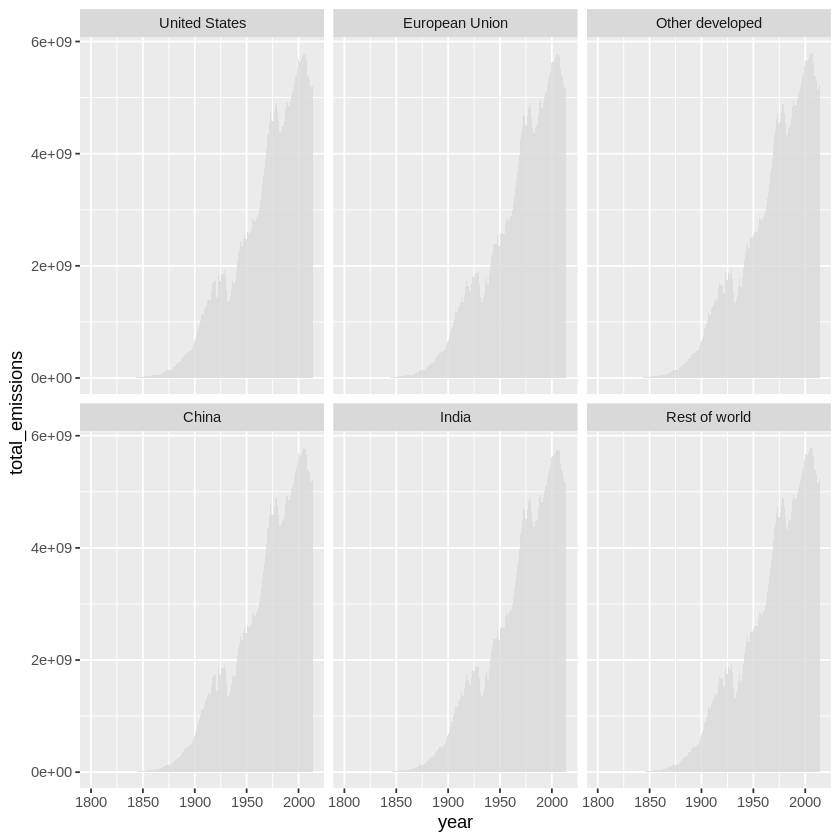

In [33]:
#Apresentação dos dados no gráfico de área
ggplot(us_repeated, aes(x = year, y = total_emissions)) + geom_area(fill = "gray85", alpha = 0.8) + facet_wrap(~chart_groups, nrow = 2)

In [34]:
g <- ggplot(us_repeated, aes(x = year, y = total_emissions)) + geom_area(fill = "gray85", alpha = 0.8) + facet_wrap(~chart_groups, nrow = 2)

In [35]:
#Limitando os dados para 1850 - 2014 inclusão de quebras (0,4 e 8)
g <- g + scale_x_continuous(limits = c(1850, 2014), breaks = c(1850, 2014)) + scale_y_continuous(labels = formatter_billions, limits = c(0,8*10^9), breaks = c(0, 4, 8)*10^9, minor_breaks = c(2, 6)*10^9)

Warning message:
“Removed 300 rows containing missing values (position_stack).”


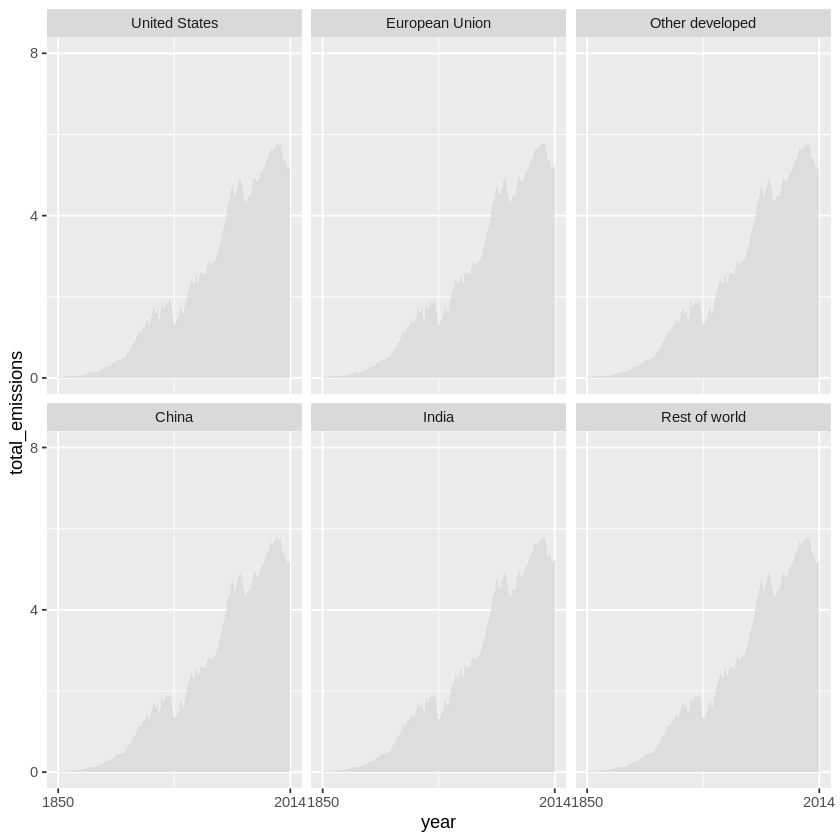

In [36]:
g

In [37]:
#Removendo o fundo
g <- g + theme(strip.background = element_blank(), panel.background = element_blank(), axis.ticks = element_blank())

Warning message:
“Removed 300 rows containing missing values (position_stack).”


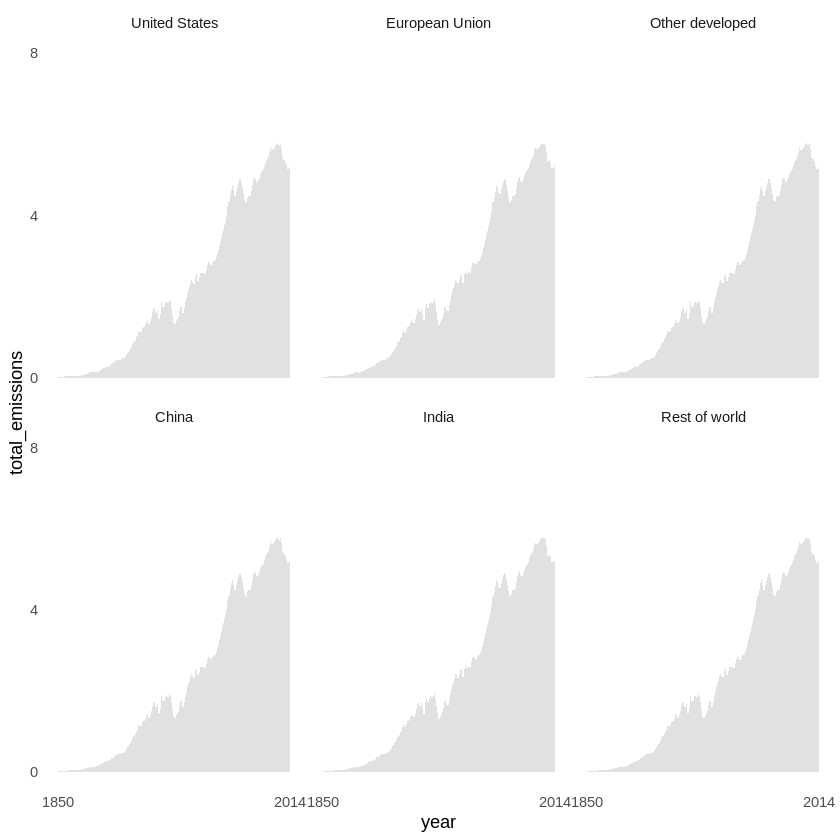

In [38]:
g

In [39]:
#Incluindo linhas pontilhadas para p eixo Y
g <- g + theme(panel.grid.major.y = element_line(color = "gray85", linetype = "dotted"), panel.grid.minor.y = element_line(color = "gray85", linetype = "dotted"))

Warning message:
“Removed 300 rows containing missing values (position_stack).”


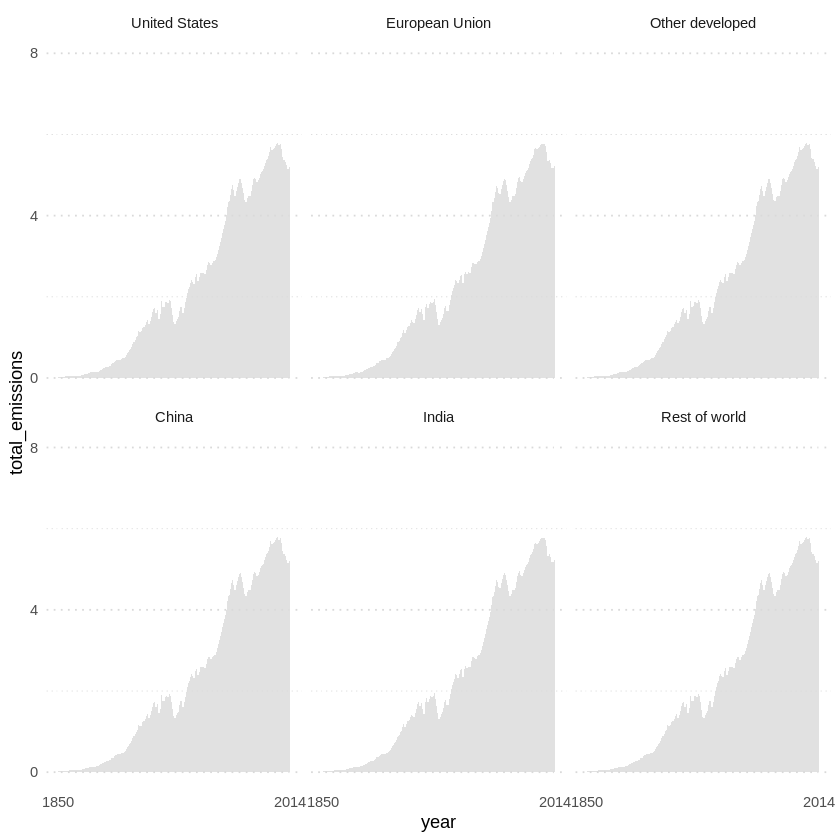

In [40]:
g

In [41]:
#Incluindo espaçamento entre os painéis e aumentando o tamanho do texto
g <- g + theme(panel.spacing = unit(2, "lines"), strip.text = element_text(size = 12, face = "bold"), axis.title = element_blank(), axis.text = element_text(size = 10))

Warning message:
“Removed 300 rows containing missing values (position_stack).”


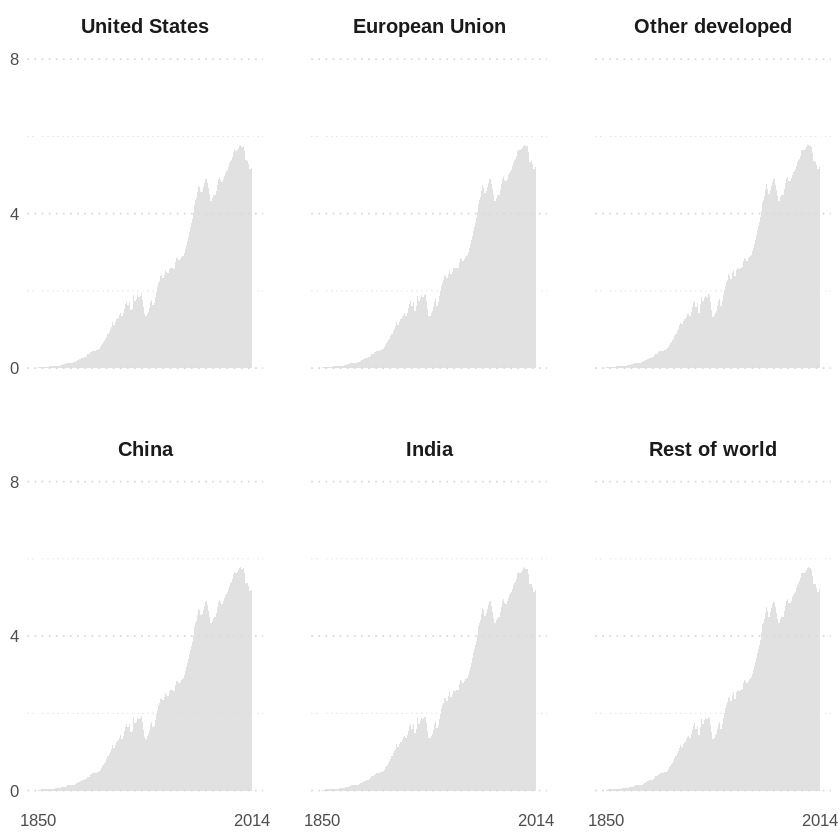

In [42]:
g

In [43]:
#Ajustes na representação gráfica dos dados, os dados dos estados unidos serão incluídos no fundo
g <- g + geom_area(data = by_chart_groups, aes(x = year, y = total_emissions, fill = economy_type), alpha = 0.9) + scale_fill_manual(values = econ_type_colors, guide = guide_legend(label.position = "right", title = NULL))

Warning message:
“Removed 300 rows containing missing values (position_stack).”
Warning message:
“Removed 306 rows containing missing values (position_stack).”


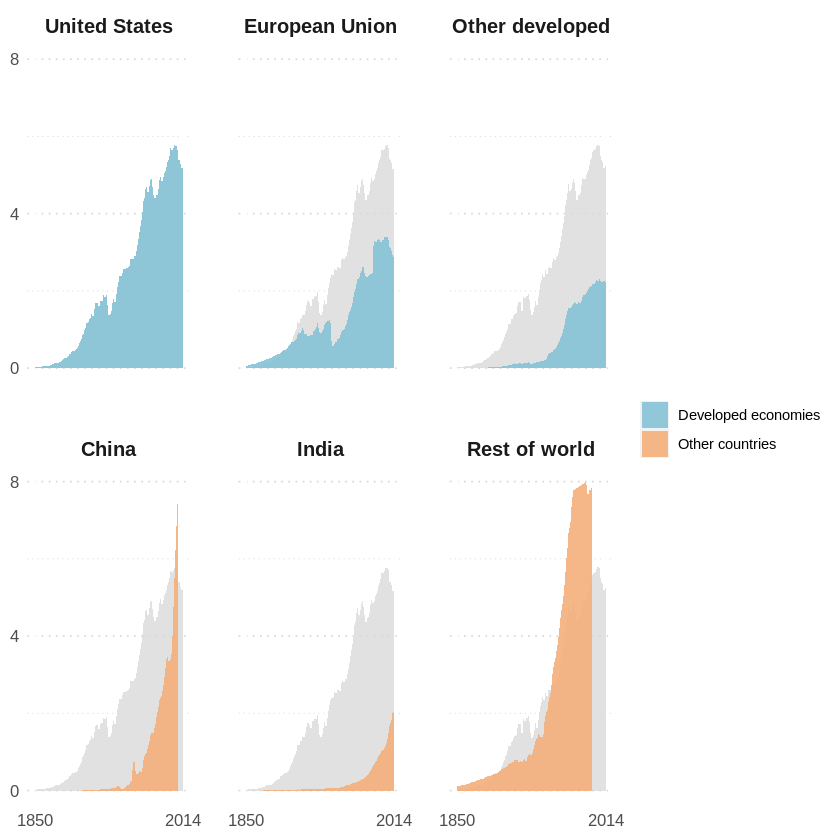

In [44]:
g

In [45]:
#Ajustes na lefenda e inclusão de label
g <- g + theme(legend.position = "bottom")
g <-  g + geom_text(data = annotations_txt, aes(x = 1850, y = y, label = txt), size = 3, hjust = "inward", vjust  = "inward")

Warning message:
“Removed 300 rows containing missing values (position_stack).”
Warning message:
“Removed 306 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


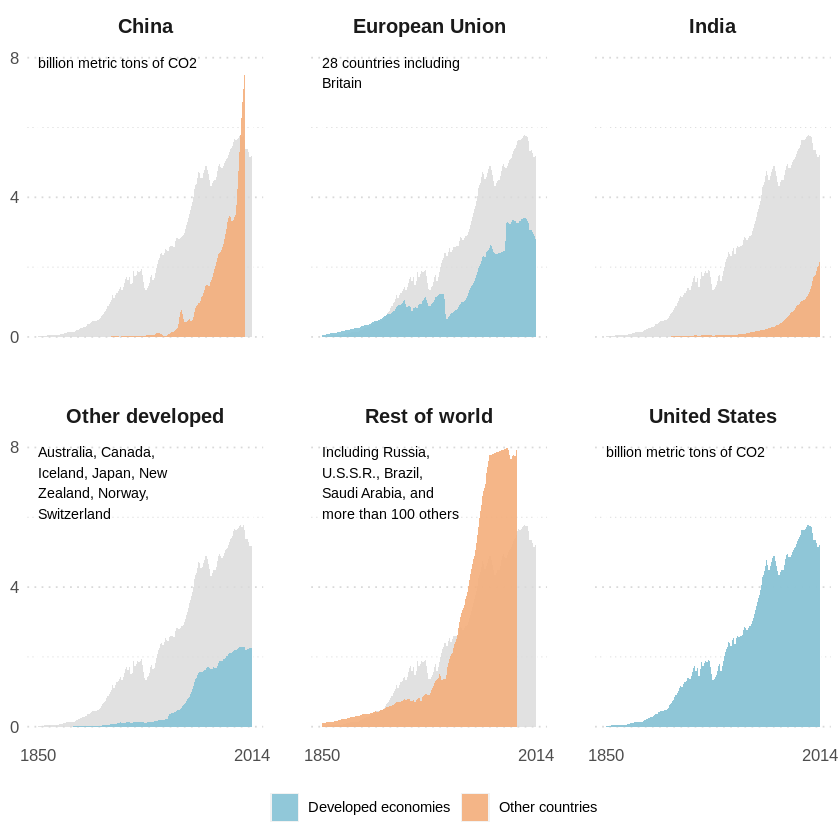

In [46]:
#Visualização e análise dos dados:
# 1 - O grafico não permite uma análise critica dos dados, é possível visualizar a ascensão repetina da China, conseguindo superar os Estados Unidos
g

**Criando Gráfico de área empilhada, para melhorar a visualização dos dados**

In [47]:
#Criando Categoria para a Russia, para que ela apareça no gráfico
by_chart_groups_rus <- filter(emissions_by_countries, country != 'Russia') %>%
  group_by(year, chart_groups, economy_type) %>% 
  summarize(total_emissions = sum(co2_total_emissions*10^3, na.rm = TRUE)) %>% 
  ungroup() %>%
  bind_rows(., filter(emissions_by_countries, country == 'Russia') %>%
              group_by(year, economy_type) %>% 
              summarize(total_emissions = sum(co2_total_emissions*10^3, na.rm = TRUE)) %>% 
              ungroup() %>%
              mutate(chart_groups = 'Russia')) %>% 
  mutate(chart_groups = factor(chart_groups, levels = c('Rest of world', 'India', 'China', 'Russia', 'Other developed', 'European Union', 'United States'))) %>%
  arrange(year, chart_groups)

`summarise()` regrouping output by 'year', 'chart_groups' (override with `.groups` argument)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



In [48]:
by_chart_groups_rus 

year,chart_groups,economy_type,total_emissions
<dbl>,<fct>,<chr>,<dbl>
1751,Rest of world,Other countries,9358184
1752,Rest of world,Other countries,9361851
1753,Rest of world,Other countries,9361851
1754,Rest of world,Other countries,9365518
1755,Rest of world,Other countries,9369185
1756,Rest of world,Other countries,10014577
1757,Rest of world,Other countries,10018244
1758,Rest of world,Other countries,10021911
1759,Rest of world,Other countries,10025578


In [49]:
glimpse(by_chart_groups_rus)

Rows: 1,355
Columns: 4
$ year            <dbl> 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759,…
$ chart_groups    <fct> Rest of world, Rest of world, Rest of world, Rest of …
$ economy_type    <chr> "Other countries", "Other countries", "Other countrie…
$ total_emissions <dbl> 9358184, 9361851, 9361851, 9365518, 9369185, 10014577…


In [50]:
#Criação do Gráfico 
g <- ggplot(by_chart_groups_rus, aes(x = year, y = total_emissions, fill = chart_groups)) + geom_area(color = "white", size = 0.3) 
g <- g + scale_fill_manual(values = c(rep("#F4AE7B", 4), rep("#86C3D6", 3)), guide = FALSE)
g <- g + scale_x_continuous(limits = c(1850, 2014), breaks = seq(from = 1850, to = 2014, by = 50), expand = c(0, 0)) + scale_y_continuous(position = "right", expand = c(0, 0), labels = formatter_billions, breaks = seq(from = 0, to = 35, by = 5)*10^9)

Warning message:
“Removed 276 rows containing missing values (position_stack).”


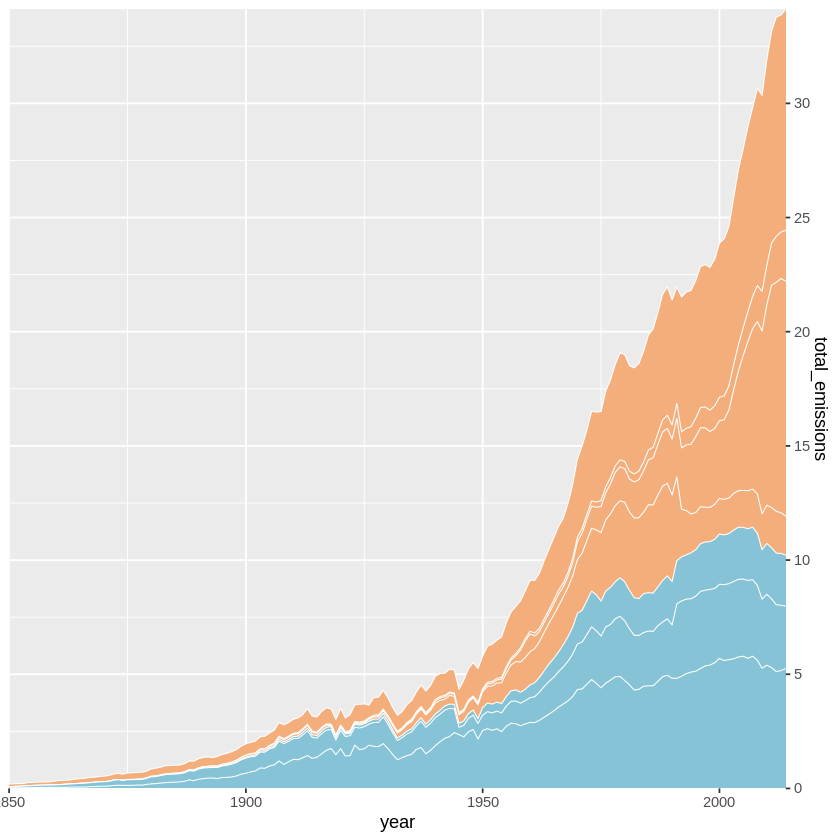

In [51]:
g

In [52]:
#Alterando a cor dos rótulos dos eixos
g <- g + theme(panel.background = element_blank(), axis.ticks.length = unit(5, "points"), axis.text = element_text(color = "grey70", size = 10), axis.ticks = element_line(color = "grey70"))
g <- g + theme(axis.title = element_blank(), plot.margin = unit(c(0, 25, 15, 15), "points"))

Warning message:
“Removed 276 rows containing missing values (position_stack).”


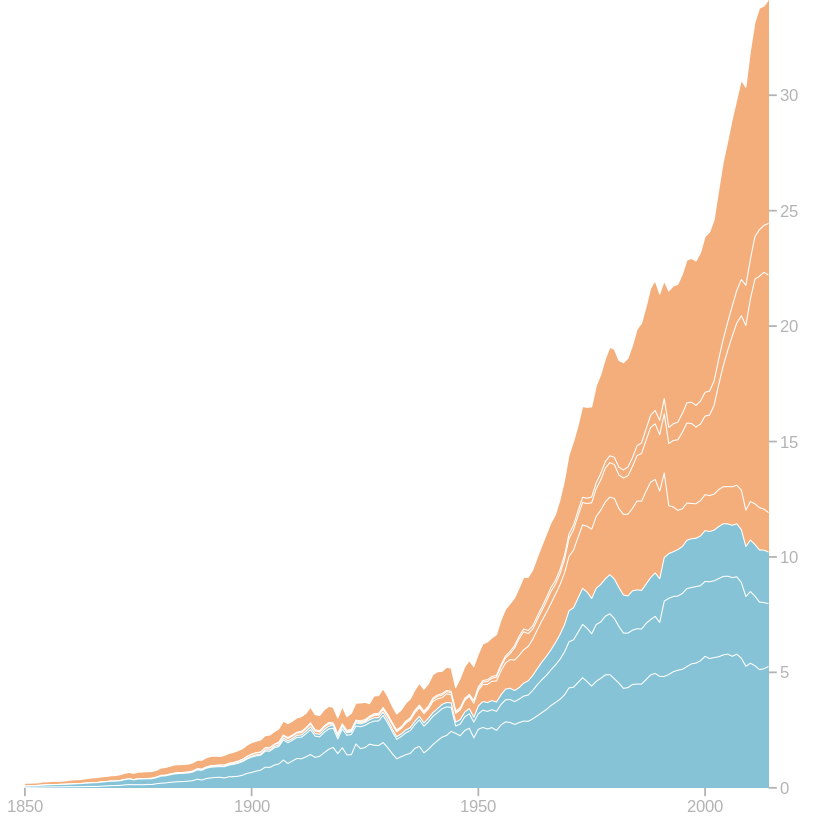

In [53]:
g

In [54]:
#Incluindo os nomes dos países às áreas
ann_text <- filter(by_chart_groups_rus, year == 2014) %>% 
  arrange(desc(chart_groups)) %>% 
  mutate(cumtot = cumsum(total_emissions)) %>%
  select(chart_groups, y = cumtot) %>%
  mutate(x = 2000) %>%
  mutate(x = ifelse(chart_groups == 'India', 2010, x),
         y = ifelse(chart_groups == 'India', 23.5*10^9, 
                    ifelse(chart_groups == 'China', 16*10^9, 
                           ifelse(chart_groups == 'Rest of world', 30*10^9, y))))
g <- g + geom_text(data = ann_text, aes(x = x, y = y, label = chart_groups), vjust = 1)
g <- g + annotate(geom = "text", x = 1925, y = 25*10^9, label = "CO2 emitted worldwide", fontface = 2, hjust = 0)
g <- g + annotate(geom = "text", x = 1925, y = 24*10^9, label = "Between 1850-2014", hjust = 0, vjust = 0)

Warning message:
“Removed 276 rows containing missing values (position_stack).”


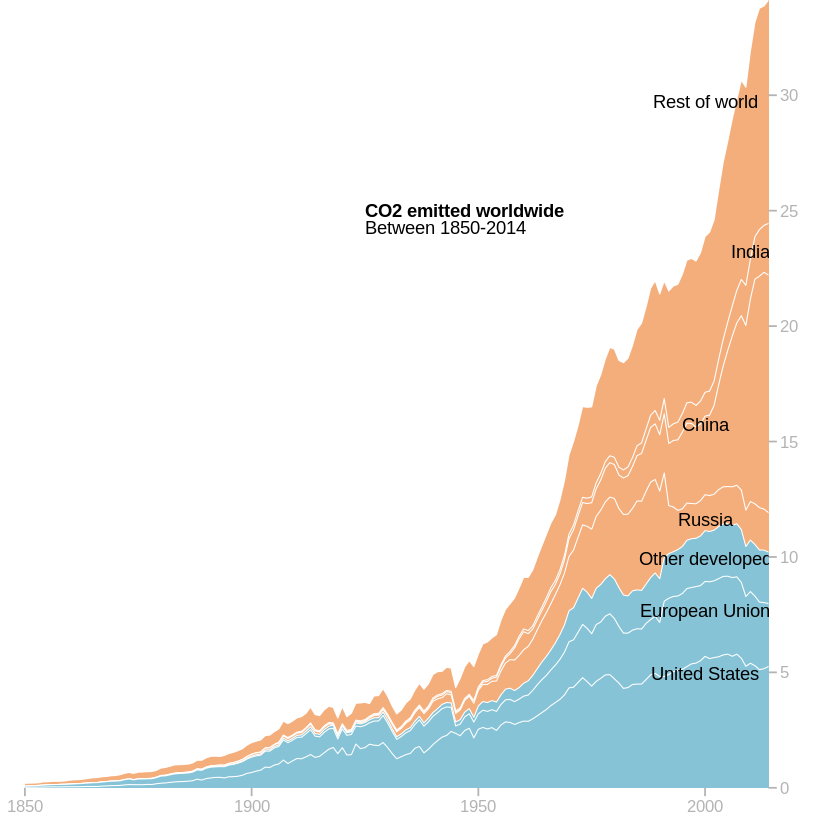

In [55]:
##Visualização e análise dos dados:
# 1 - O Gráfico de área empilhada permite visualizar a o total acumulado e as proporções das categorias
g

**Crinado um gráfico de barra com os 10 principais emissores:**

In [56]:
top_per_capity_country <- filter(emissions_by_countries, year == 2014) %>% top_n(n = 10, wt = co2_per_capita_emission_rate)

In [57]:
#Plotando os dados no gráfico de barras
g <- ggplot(top_per_capity_country, aes(x = reorder(country, co2_per_capita_emission_rate), y = co2_per_capita_emission_rate, fill = economy_type)) + geom_bar(stat = "identity") + coord_flip()
g <- g + theme(panel.background = element_blank(), axis.title = element_blank(), axis.ticks.y = element_blank(), axis.text.y = element_text(hjust = 0, color = "black", size = 12), axis.ticks.x = element_blank(), axis.text.x = element_blank()) 
g <- g + scale_fill_manual(values = econ_type_colors, guide = FALSE)
g <- g + ggtitle("Per person carbon emissions in 2014") + theme(title = element_text(face = "bold", size = 10, hjust = 0))
g <- g + geom_text(aes(y = co2_per_capita_emission_rate, x = country, label = round(co2_per_capita_emission_rate, digits = 1)), nudge_y =  -1)

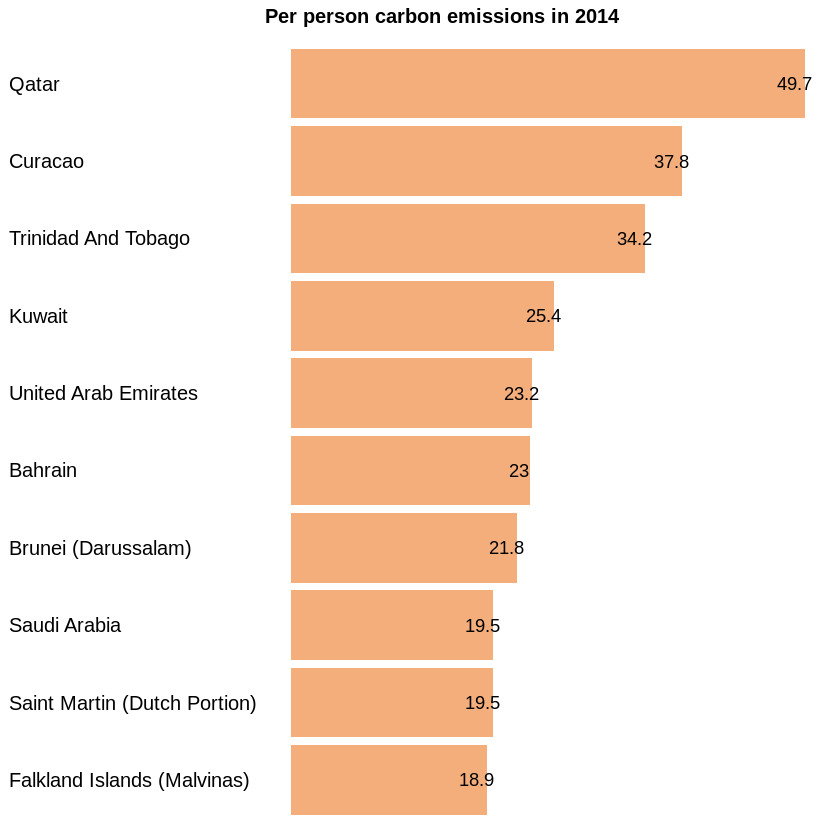

In [58]:
g

In [59]:
#Atribuindo o grupo de países ao Top 10
nyt_top_10 <- c('United States Of America', 'Canada', 'Russia', 'Japan', 'Germany', 'China', 'United Kingdom', 'France', 'Mexico', 'Brazil', 'India')
top_per_capity_country <- filter(emissions_by_countries, year == 2014 & country %in% nyt_top_10)

In [60]:
g <- ggplot(top_per_capity_country, aes(x = reorder(country, co2_per_capita_emission_rate), y = co2_per_capita_emission_rate, fill = economy_type)) + geom_bar(stat = "identity") + coord_flip()
g <- g + theme(panel.background = element_blank(), axis.title = element_blank(), axis.ticks.y = element_blank(), axis.text.y = element_text(hjust = 0, color = "black", size = 12), axis.ticks.x = element_blank(), axis.text.x = element_blank()) 
g <- g + scale_fill_manual(values = econ_type_colors, guide = FALSE)
g <- g + ggtitle("Per person carbon emissions in 2014") + theme(title = element_text(face = "bold", size = 10, hjust = 0))
g <- g + geom_text(aes(y = co2_per_capita_emission_rate, x = country, label = round(co2_per_capita_emission_rate, digits = 1)), nudge_y =  -0.5)


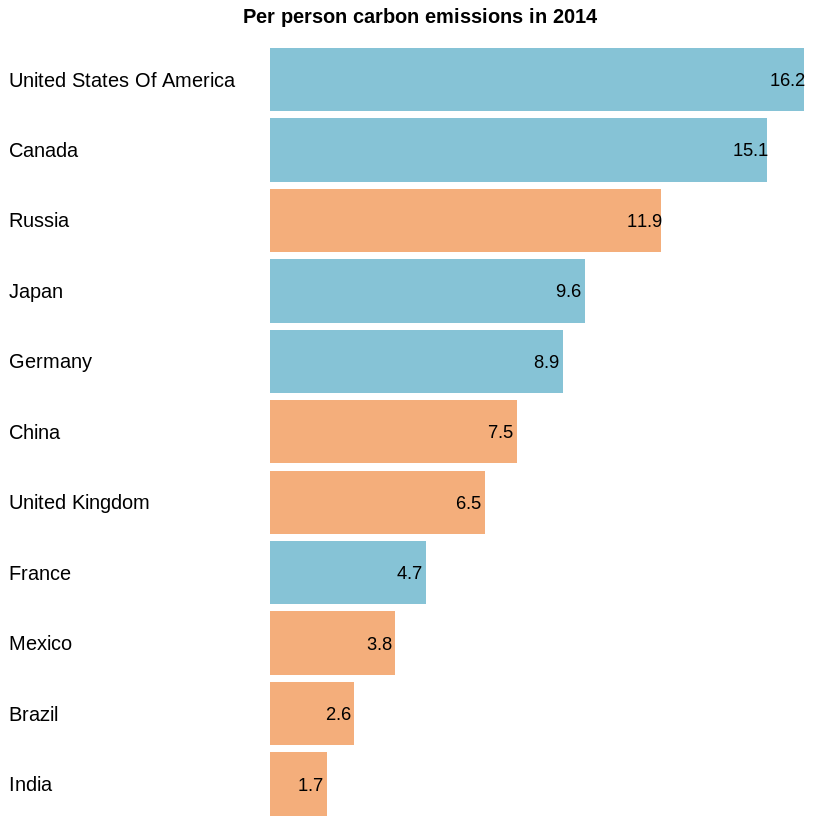

In [61]:
#Vizualização dos dados
g

In [79]:
#Melhorando a Visualização dos dados
g <- g + theme(axis.ticks.x = element_line(color = "gray80"), axis.text.x = element_text(color = "black")) 
g <- g + geom_hline(yintercept = seq(from = 5, to = 15, by = 5), color = "gray85")

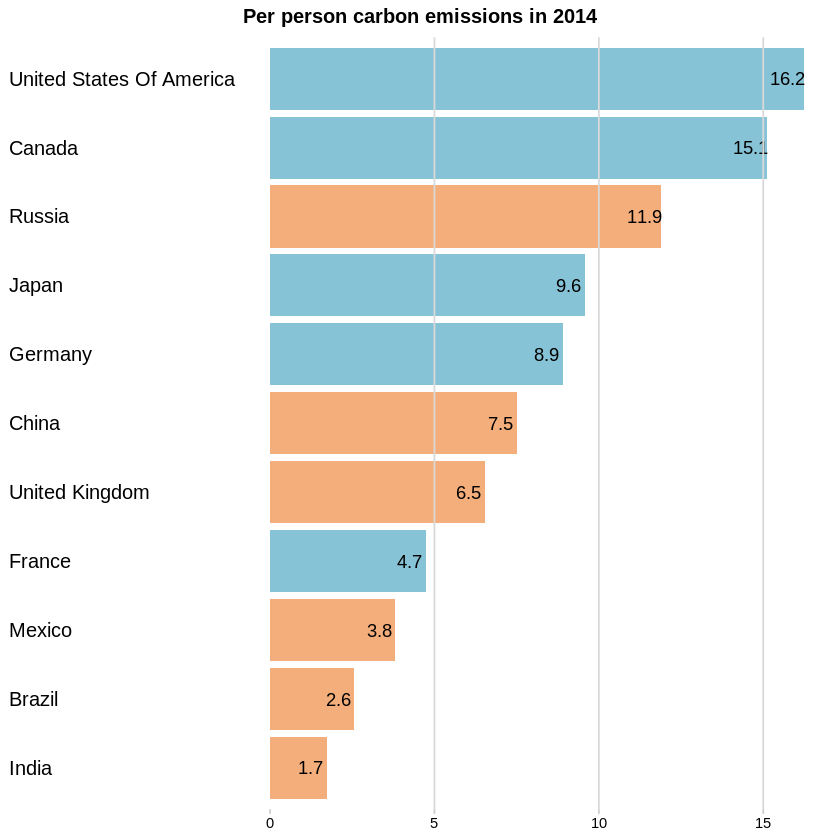

In [63]:
g

**Criando Gráfico de linhas para verificar se a análise dos dados fica melhor que os gráficos acima**

In [64]:
last_year_emission <- filter(emissions_by_countries, year == 2014) %>% select(year, country, co2_total_emissions) %>% mutate(totem = co2_total_emissions*10^3)

In [65]:
g <- ggplot(emissions_by_countries, aes(x = year, y = co2_total_emissions*10^3, group = country, color = economy_type, label = country)) + geom_line(size = 1) + geom_text(data = last_year_emission, aes(x = year, y = totem, label = country), nudge_x = 2, hjust = 0, check_overlap = TRUE, inherit.aes = FALSE) + scale_x_continuous(expand = c(0.2, 0))
g <- g + scale_color_manual(values = econ_type_colors, guide = FALSE)
g <- g  + scale_y_continuous(expand = c(0.05, 0), labels = formatter_billions)
g <- g + theme(panel.background = element_blank(), axis.text = element_text(color = "grey70", size = 10), axis.ticks = element_blank(), axis.title = element_blank())
g <- g + theme(plot.margin = unit(c(2, 1, 1, 1), "lines"))

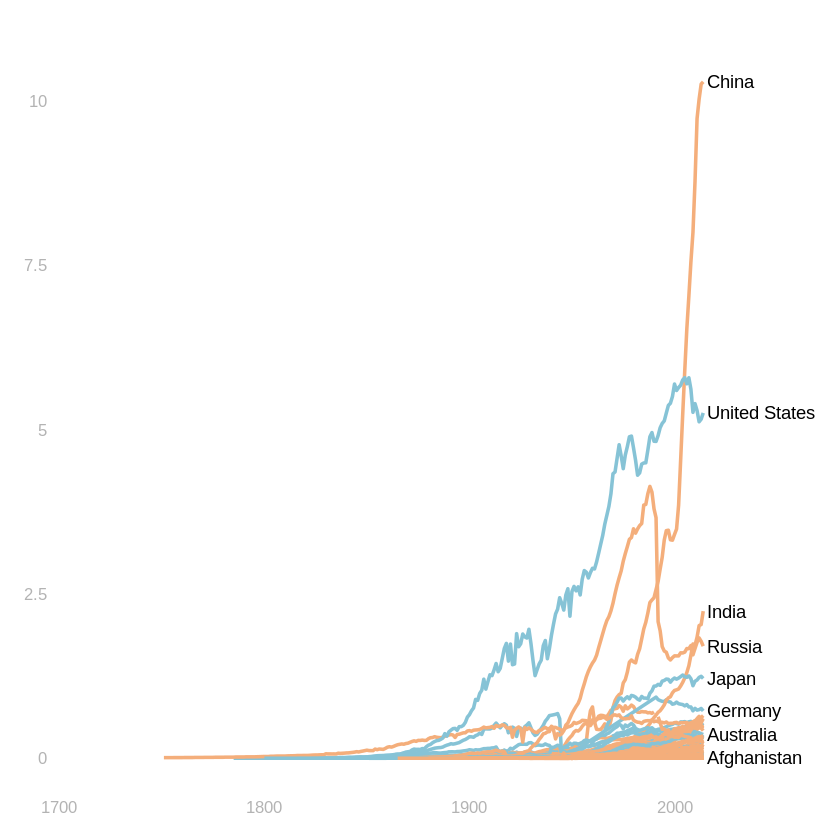

In [66]:
g

In [67]:
#Análise dos últimos 30 anos
g <- ggplot(filter(emissions_by_countries, year > 1984), aes(x = year, y = co2_total_emissions*10^3, group = country, color = economy_type, label = country)) + geom_line(size = 1) + geom_text(data = last_year_emission, aes(x = year, y = totem, label = country), nudge_x = 2, hjust = 0, check_overlap = TRUE, inherit.aes = FALSE) + scale_x_continuous(expand = c(0.2, 0))
g <- g + scale_color_manual(values = econ_type_colors, guide = FALSE)
g <- g  + scale_y_continuous(expand = c(0.05, 0), labels = formatter_billions)
g <- g + theme(panel.background = element_blank(), axis.text = element_text(color = "grey70", size = 10), axis.ticks = element_blank(), axis.title = element_blank())
g <- g + theme(plot.margin = unit(c(2, 1, 1, 1), "lines"))

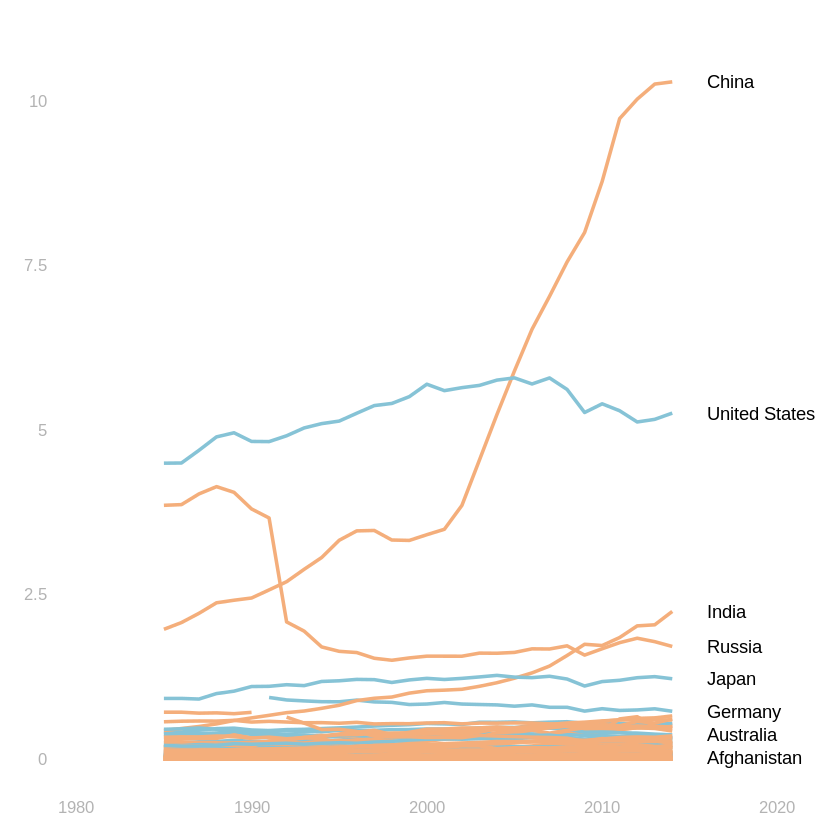

In [68]:
g

**Visualização dos dados no gráfico de bolha**

In [69]:

last_year_emission <- filter(emissions_by_countries, year == 2014) %>% 
  mutate(totem = co2_total_emissions*10^3,
         paris_agreement = ifelse(country %in% c('United States Of America', 'Nicaragua', 'Syrian Arab Republic'), 'NOT PART OF AGREEMENT', 'PART OF AGREEMENT'))


In [71]:
last_year_emission <- last_year_emission %>% 
  arrange(desc(paris_agreement), desc(totem)) %>% 
  mutate(group_num = rep(1:5, 44),
         y = cut(totem, breaks = quantile(totem, probs = seq(0, 1, 0.05)))) %>%
  filter(!(is.na(y)))

In [72]:
g <- ggplot(data = last_year_emission, aes(x = group_num, y = y, size = totem, fill = economy_type, label = country)) + geom_jitter(shape = 21, alpha = 0.8)  + scale_size(range = c(2, 30)) + geom_text(size = 3, check_overlap = TRUE) + scale_fill_manual(values = econ_type_colors) + facet_wrap(~paris_agreement)
g <- g + theme(panel.background = element_blank(), axis.text = element_blank(), axis.title = element_blank(), axis.ticks = element_blank()) + guides(size = FALSE, fill = FALSE)
g <- g + scale_y_discrete(expand = c(0.1, 0)) + theme(strip.background = element_blank()) + ggtitle("Total CO2 Emissions 2014")

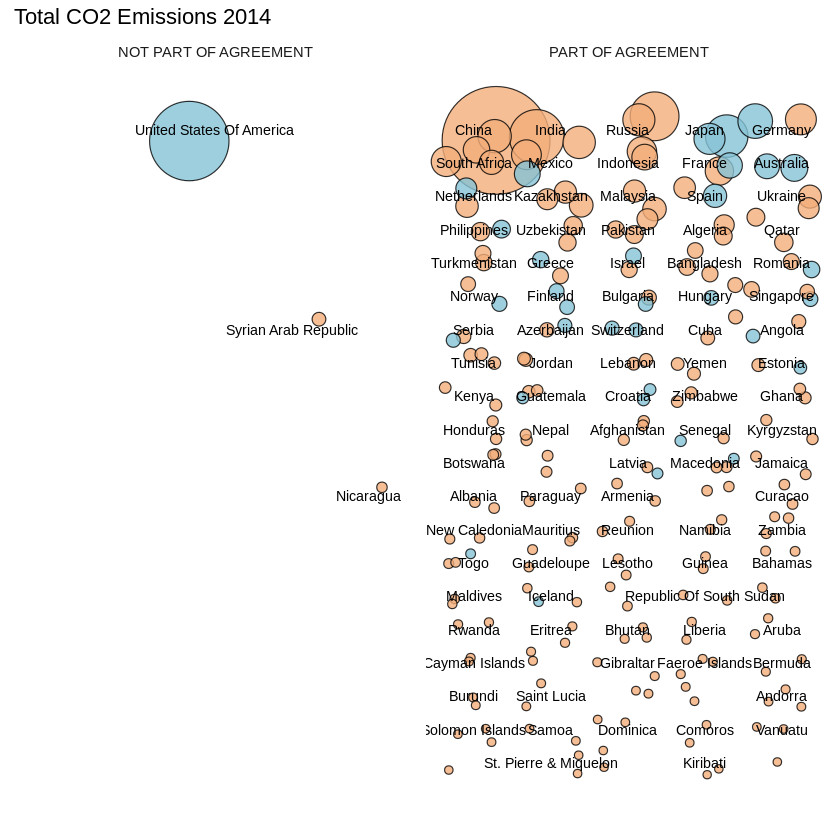

In [73]:
g

In [74]:
g <- ggplot(data = last_year_emission, aes(x = group_num, y = totem, size = totem, fill = economy_type, label = country)) + geom_point(shape = 21, alpha = 0.8)  + scale_size(range = c(2, 30)) + geom_text(size = 3, check_overlap = TRUE) + scale_fill_manual(values = econ_type_colors) + facet_wrap(~paris_agreement)
g <- g + theme(panel.background = element_blank(), axis.text = element_blank(), axis.title = element_blank(), axis.ticks = element_blank()) + guides(size = FALSE, fill = FALSE)
g <- g + scale_x_continuous(expand = c(0.5, 0)) + scale_y_log10(expand = c(0.01, 0.5)) + theme(strip.background = element_blank()) +  ggtitle("Total CO2 Emissions 2014")

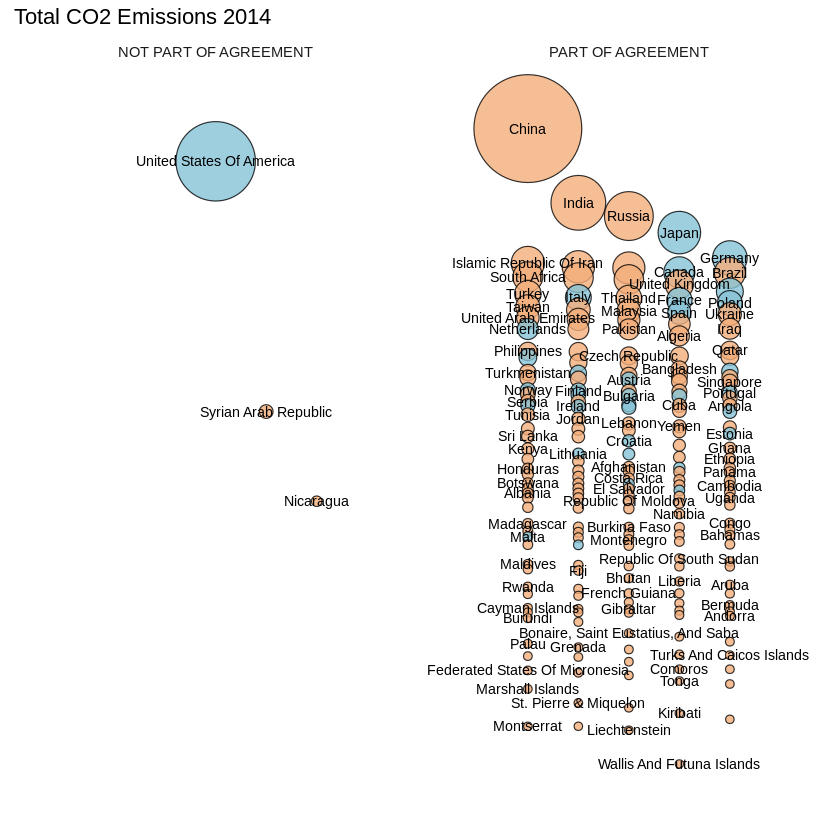

In [75]:
g

In [76]:
emission_clusters <- kmeans(select(last_year_emission, -country, -year, -(EU:y)), 10)
last_year_emission <- mutate(last_year_emission, emission_cluster = emission_clusters$cluster)

In [77]:
g <- ggplot(data = last_year_emission, aes(x = emission_cluster, y = totem, size = totem, fill = economy_type, label = country)) + geom_jitter(shape = 21, alpha = 0.8)  + scale_size(range = c(2, 30)) + geom_text(size = 3, check_overlap = TRUE)  + facet_wrap(~paris_agreement) + scale_fill_manual(values = econ_type_colors)
g <- g + theme(panel.background = element_blank(), axis.text = element_blank(), axis.title = element_blank(), axis.ticks = element_blank()) + guides(size = FALSE, fill = FALSE)
g <- g + scale_x_continuous(expand = c(0.5, 0)) + scale_y_log10(expand = c(0.01, 0.5)) + theme(strip.background = element_blank()) +  ggtitle("Total CO2 Emissions 2014")

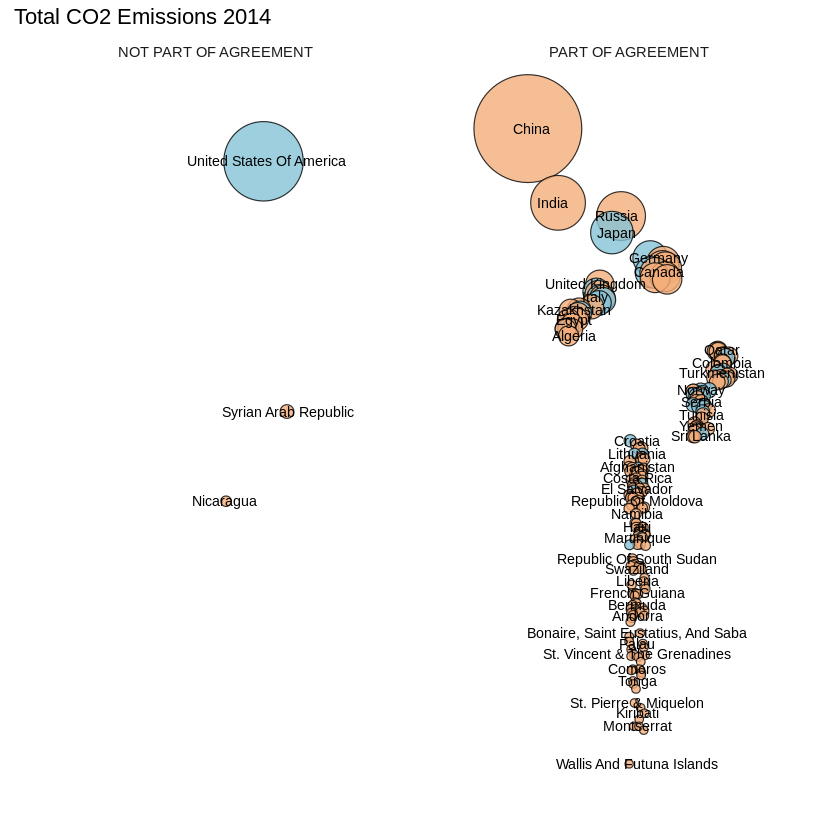

In [78]:
plot(g)

In [ ]:
O Objetivo desta implementação foi executar um código R dentro do colab verificando a diferença entre as ferramentas Rstudio e o Colab.

Referencias:

https://cdiac.ess-dive.lbl.gov/ftp/fossilfuel-co2-emissions/CSV-FILES/nation.1751_2014.csv

http://europa.eu/european-union/about-eu/countries_en

 https://nandeshwar.info/data-visualization/nyt-wapo-data-visualization-r/